In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("datatest2.txt")

df.head()

feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

label = 'Occupancy'

X = df[feature_names]
y = df[label]

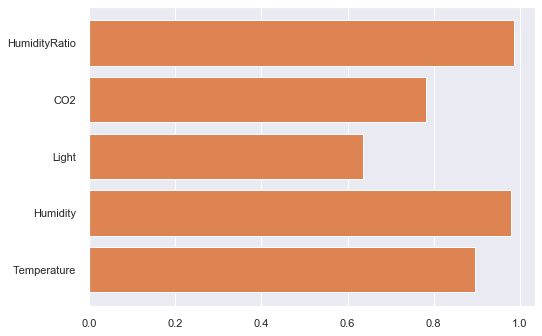

In [163]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = feature_names, algorithm = 'shapiro')

visualizer.fit(X,y)
visualizer.transform(X)
visualizer.draw()


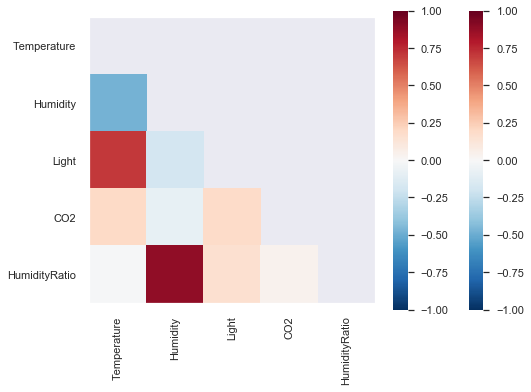

In [164]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(features = feature_names, algorithm = 'pearson')

visualizer.fit(X,y)
visualizer.transform(X)
visualizer.draw()


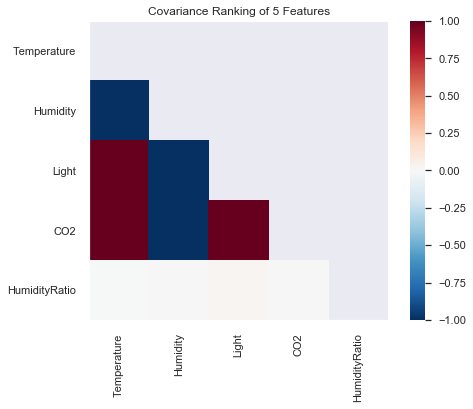

In [165]:
visualizer = Rank2D(features=feature_names, algorithm='covariance')

visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [166]:
import yellowbrick
yellowbrick.__version__

'1.1'

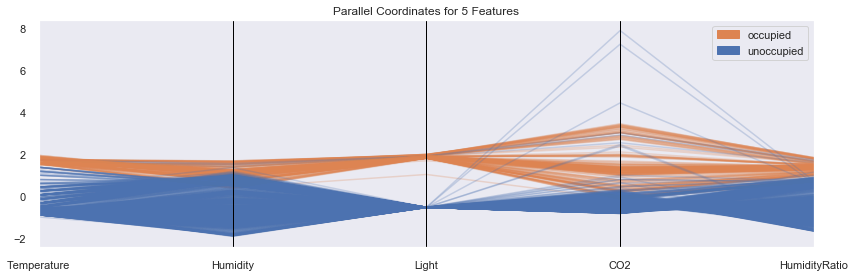

In [167]:
from yellowbrick.features import ParallelCoordinates
classes = ['unoccupied', 'occupied']
visualizer = ParallelCoordinates(classes=classes, features=feature_names,
                                 normalize = 'standard',
                                sample = 0.1, size = (1000,300))

visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

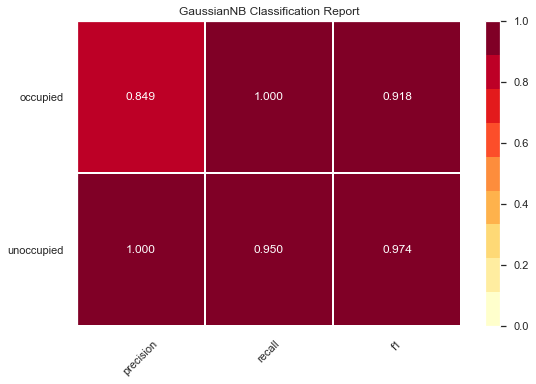

In [170]:
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

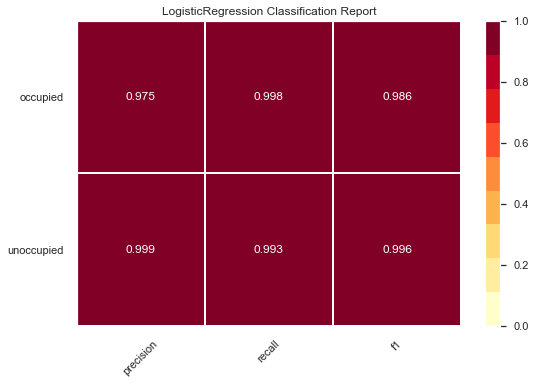

In [171]:
bayes = LogisticRegression()
visualizer = ClassificationReport(bayes, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

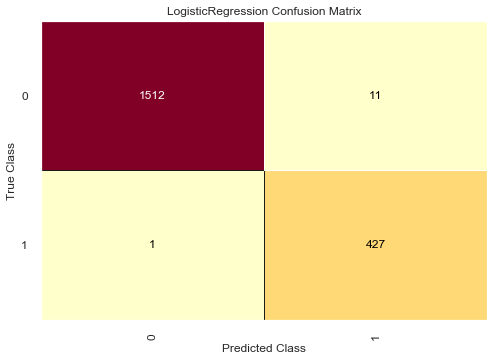

In [172]:
logReg = LogisticRegression()
visualizer = ConfusionMatrix(logReg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

In [173]:
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l1, l2
from keras.metrics import BinaryAccuracy

datatest = pd.read_csv("datatest.txt")
datatest2 = pd.read_csv("datatest2.txt")
datatraining = pd.read_csv("datatraining.txt")

In [174]:
# Data Exploration

print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [175]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [176]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [192]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop = True, inplace = True)
datatest2.reset_index(drop= True, inplace = True)
datatraining.reset_index(drop= True, inplace = True)
datatraining.describe()


from sklearn.utils import shuffle
shuffle(datatest)

shuffle(datatest2)
shuffle(datatraining)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
5969,2015-02-08 21:20:00,0.093301,0.475807,0.000000,0.025530,0.298571,0,0
5100,2015-02-08 06:51:00,0.047847,0.659515,0.000000,0.012842,0.436315,0,0
3554,2015-02-07 05:05:00,0.178230,0.118226,0.000000,0.018103,0.020526,0,0
1717,2015-02-05 22:27:59,0.382775,0.185272,0.000000,0.027387,0.119382,0,0
5130,2015-02-08 07:21:00,0.023923,0.654598,0.000000,0.016246,0.425199,0,1
...,...,...,...,...,...,...,...,...
4279,2015-02-07 17:10:00,0.382775,0.180802,0.000000,0.011708,0.115423,0,1
3098,2015-02-06 21:29:00,0.287081,0.100793,0.000000,0.021198,0.026273,0,0
1254,2015-02-05 14:44:59,0.787081,0.522144,0.315154,0.392542,0.541519,1,1
3082,2015-02-06 21:13:00,0.287081,0.105263,0.000000,0.021198,0.030130,0,0


In [193]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean      0.387341     0.401676     0.077292     0.119942       0.312576   
std       0.243281     0.247233     0.125947     0.194536       0.224186   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.167464     0.154431     0.000000     0.016246       0.106304   
50%       0.332536     0.423623     0.000000     0.025220       0.296338   
75%       0.571770     0.616307     0.165795     0.139925       0.441308   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       period_of_day  
count    8143.000000  
mean        0.425273  
std         0.494415  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


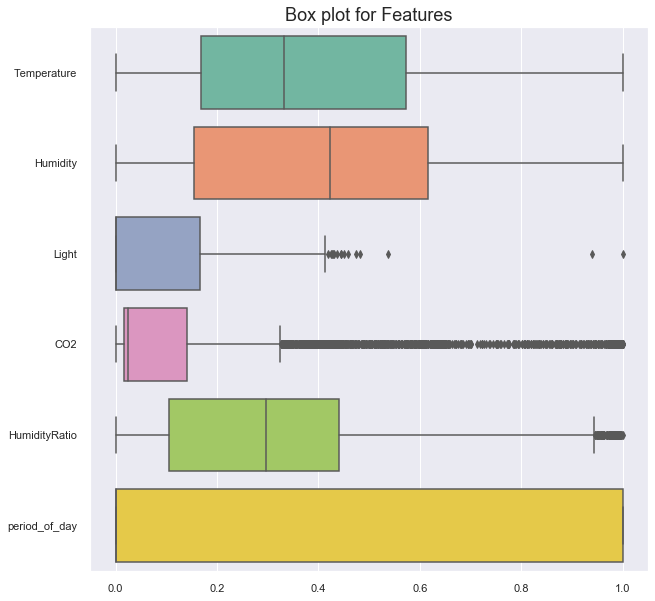

In [194]:
plt.figure(figsize = (10,10))
plt.title('Box plot for Features', fontdict = {'fontsize':18})
ax = sns.boxplot(data = datatraining.drop(['date', 'Occupancy'], axis=1),
                                          orient = "h", palette ="Set2")

print(datatraining.drop(['date', 'Occupancy'], axis = 1).describe())

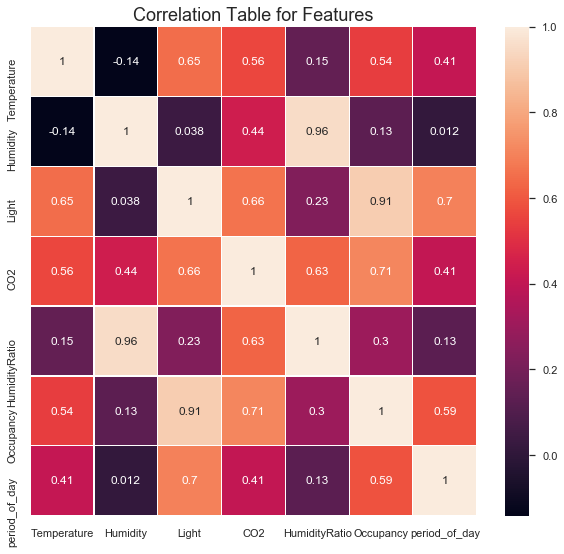

In [195]:
plt.figure(figsize = (10,9))
plt.title("Correlation Table for Features", fontdict = {'fontsize': 18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=0.2)

In [198]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x = 'Humidity', y='Temperature', z = 'CO2',
                    size = 'Light', color = 'Occupancy', 
                    color_discrete_map={'1':'red', '0':'blue'})

fig.update_layout(scene_zaxis_type = "log", title= {'text': "Features and Occupancy",
                                                   'y':0.9,
                                                   'x':0.5,
                                                   'xanchor':'center',
                                                   'yanchor':'top'})

iplot(fig)

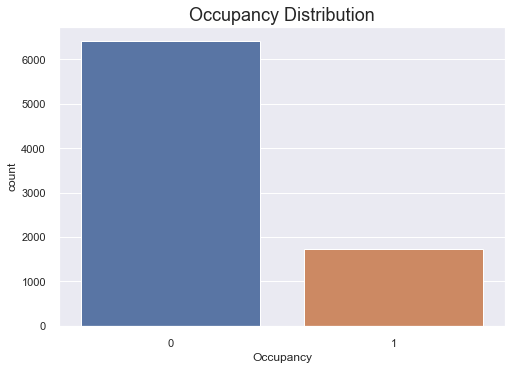

In [199]:
sns.set(style = "darkgrid")
plt.title("Occupancy Distribution", fontdict = {'fontsize':18})
ax = sns.countplot(x = "Occupancy", data = datatraining)

In [200]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

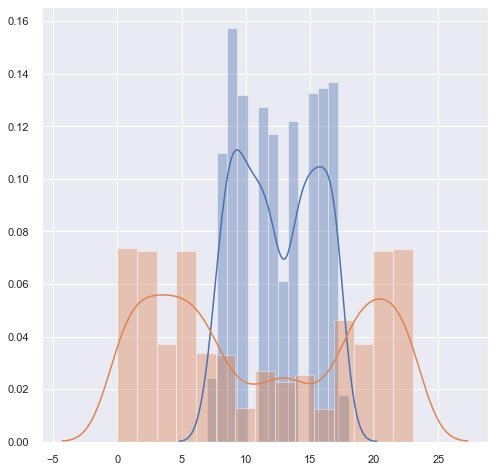

In [201]:
plt.figure(figsize = (8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [202]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0
                             for i in datatest['date']]

datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0
                             for i in datatest2['date']]

datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0
                             for i in datatraining['date']]

datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
2181,2015-02-06 06:11:59,0.308612,0.089395,0.000000,0.013152,0.020471,0,0
2225,2015-02-06 06:55:59,0.287081,0.082914,0.000000,0.015627,0.010845,0,0
4662,2015-02-07 23:32:59,0.167464,0.552240,0.000000,0.015627,0.382389,0,0
2808,2015-02-06 16:38:59,0.645933,0.205386,0.297478,0.306823,0.196249,1,1
3710,2015-02-07 07:40:59,0.167464,0.118226,0.000000,0.021198,0.018498,0,1
4996,2015-02-08 05:06:59,0.047847,0.659515,0.000000,0.013152,0.436315,0,0
6920,2015-02-09 13:11:00,0.598086,0.736507,0.020047,0.515705,0.684243,1,1
7948,2015-02-10 06:19:00,0.263158,0.733043,0.000000,0.022435,0.565773,0,0
5140,2015-02-08 07:31:00,0.000000,0.653108,0.000000,0.013977,0.416932,0,1
5672,2015-02-08 16:23:00,0.143541,0.444966,0.020047,0.002630,0.286094,0,1


In [203]:
X_train = datatraining.drop(columns = ['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [204]:
# Unsupervised Learning
n_neighbours_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbours_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight,
                                            metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+ "/"+ weight+ "/" +metric] = accuracy

In [205]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x = "Parameters", y="Accuracy")
fig.update_layout(title = {'text': "Accuracies for Different Hyper-Parameters",
                          'x': 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
iplot(fig)

In [206]:
# choosing 135 neighbours uniform weights and euclidean metric
knn_model = KNeighborsClassifier(n_neighbors=135, weights='uniform', metric= 'euclidean')
knn_model.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=135, p=2,
                     weights='uniform')

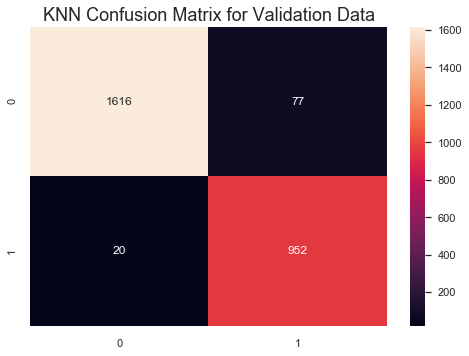

In [207]:
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict = {'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred),label = ["y_validation", "y_pred"],
                 annot=True, fmt="d")


In [208]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print(f"Accuracy for SVM on Validation data: {round((svm_model.score(X_validation, y_validation)*100),2)}%")

Accuracy for SVM on Validation data: 97.82%


In [218]:
# NN w/o regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1,  activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics = ['accuracy'])

history1 = model1.fit(X_train, y_train, epochs = 50, batch_size =30,
                      validation_data = (X_validation, y_validation) )

Epoch 1/50
272/272 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.9194 - val_loss: 0.1426 - val_accuracy: 0.9512
Epoch 2/50
272/272 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9762 - val_loss: 0.1005 - val_accuracy: 0.9655
Epoch 3/50
272/272 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9808 - val_loss: 0.0829 - val_accuracy: 0.9734
Epoch 4/50
272/272 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9840 - val_loss: 0.0831 - val_accuracy: 0.9734
Epoch 5/50
272/272 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9856 - val_loss: 0.0773 - val_accuracy: 0.9767
Epoch 6/50
272/272 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9866 - val_loss: 0.0759 - val_accuracy: 0.9767
Epoch 7/50
272/272 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9866 - val_loss: 0.0760 - val_accuracy: 0.9767
Epoch 

In [219]:
# NN with 0.2 dropout befor the hidden layer.
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1,  activation='sigmoid'))
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(X_train, y_train, epochs = 50, batch_size = 32
                     , validation_data = (X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8897 - val_loss: 0.1370 - val_accuracy: 0.9497
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9672 - val_loss: 0.1021 - val_accuracy: 0.9610
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9780 - val_loss: 0.1045 - val_accuracy: 0.9666
Epoch 4/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9815 - val_loss: 0.0883 - val_accuracy: 0.9711
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9845 - val_loss: 0.0819 - val_accuracy: 0.9749
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.0814 - val_accuracy: 0.9767
Epoch 

In [220]:
# NN with L1(Lasso) regularization
model3 = Sequential()

model3.add(Dense(32, activation='relu', input_dim=6,
                 kernel_regularizer=l1(l=0.01)))

model3.add(Dense(16, activation='relu',
                 kernel_regularizer=l1(l=0.01)))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=50,
                      batch_size=32, 
                      validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 0s 2ms/step - loss: 1.1938 - accuracy: 0.8057 - val_loss: 0.6900 - val_accuracy: 0.7734
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.9266 - val_loss: 0.3654 - val_accuracy: 0.9280
Epoch 3/50
255/255 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.9605 - val_loss: 0.3189 - val_accuracy: 0.9223
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.9640 - val_loss: 0.2703 - val_accuracy: 0.9520
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.2546 - accuracy: 0.9678 - val_loss: 0.2456 - val_accuracy: 0.9557
Epoch 6/50
255/255 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9714 - val_loss: 0.2356 - val_accuracy: 0.9441
Epoch 7/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.9732 - val_loss: 0.2130 - val_accuracy: 0.9520
Epoch 

In [221]:
# NN with L2(Ridge) Regularization
model4 = Sequential()

model4.add(Dense(32, activation='relu', input_dim=6,
                 kernel_regularizer=l2(l=0.01)))

model4.add(Dense(16, activation='relu',
                 kernel_regularizer=l2(l=0.01)))

model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.8447 - val_loss: 0.3505 - val_accuracy: 0.9475
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9682 - val_loss: 0.2474 - val_accuracy: 0.9392
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9718 - val_loss: 0.2213 - val_accuracy: 0.9415
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1824 - accuracy: 0.9749 - val_loss: 0.1885 - val_accuracy: 0.9625
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9783 - val_loss: 0.1784 - val_accuracy: 0.9576
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9802 - val_loss: 0.1698 - val_accuracy: 0.9632
Epoch 7/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9799 - val_loss: 0.1636 - val_accuracy: 0.9636
Epoch 

In [224]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

loss3 = history3.history['loss']
val_loss3 = history2.history['val_loss']

loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

fig = go.Figure()

fig.add_trace(go.Scatter(x = np.arange(len(loss1)), y = loss1,
                        name = 'Training Loss without Regularization',
                        line = dict(color = 'royalblue')))
fig.add_trace(go.Scatter(x = np.arange(len(val_loss1)), y = val_loss1,
                        name = 'Val Loss without Regularization',
                        line = dict(color = 'firebrick')))


fig.add_trace(go.Scatter(x = np.arange(len(loss2)), y = loss2,
                        name = 'Training Loss with dropout',
                        line = dict(color = 'royalblue', dash = 'dash')))
fig.add_trace(go.Scatter(x = np.arange(len(val_loss2)), y = val_loss2,
                        name = 'Val Loss with dropout',
                        line = dict(color = 'firebrick', dash = 'dash')))

fig.add_trace(go.Scatter(x = np.arange(len(loss3)), y = loss3,
                        name = 'Training Loss with Lasso Regularization',
                        line = dict(color = 'royalblue', dash = 'dot')))
fig.add_trace(go.Scatter(x = np.arange(len(val_loss3)), y = val_loss3,
                        name = 'Val Loss with Lasso Regularization',
                        line = dict(color = 'firebrick', dash = 'dot')))

fig.add_trace(go.Scatter(x = np.arange(len(loss4)), y = loss4,
                        name = 'Training Loss with Ridge Regularization',
                        line = dict(color = 'royalblue', dash = 'longdashdot')))
fig.add_trace(go.Scatter(x = np.arange(len(val_loss4)), y = val_loss4,
                        name = 'Val Loss with Ridge Regularization',
                        line = dict(color = 'firebrick', dash = 'longdashdot')))
              

fig.update_layout(xaxis_title = 'Epochs',
                 yaxis_title = 'Loss',
                 title = {'text': "Training and Validation Losses for Different Models",
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'})
              
iplot(fig)
              

In [228]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=6,
                kernel_regularizer=l2(l=0.01)))

model.add(Dropout(0.3))

model.add(Dense(32, activation='relu',
                kernel_regularizer=l2(l=0.01)))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
255/255 [==============================] - 1s 2ms/step - loss: 0.6062 - accuracy: 0.8564
Epoch 2/50
255/255 [==============================] - 0s 966us/step - loss: 0.2665 - accuracy: 0.9516
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9644
Epoch 4/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9686
Epoch 5/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9732
Epoch 6/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9741
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9779
Epoch 8/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9792
Epoch 9/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1376 - accuracy: 0.9795
Epoch 10/50
255/255 [==============================] - 0s 966us/step - loss: 0.1349 - accuracy: 0.

In [230]:
print(f"Accuracy for SVM on test data: {round((svm_model.score(X_test, y_test)*100),2)}%\n")
print(f"Accuracy for Neural Network model on test data: {round((model.evaluate(X_test, y_test)[1]*100),2)}%")

Accuracy for SVM on test data: 98.38%

305/305 [==============================] - 0s 831us/step - loss: 0.1032 - accuracy: 0.97450s - loss: 0.0926 - accuracy: 0.
Accuracy for Neural Network model on test data: 97.45%


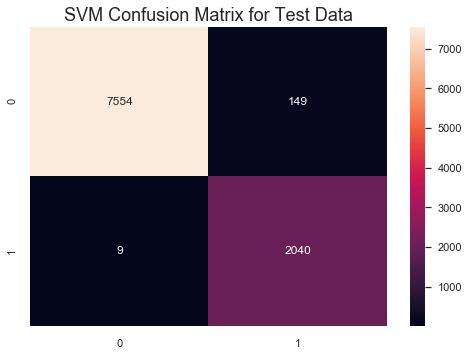

In [231]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

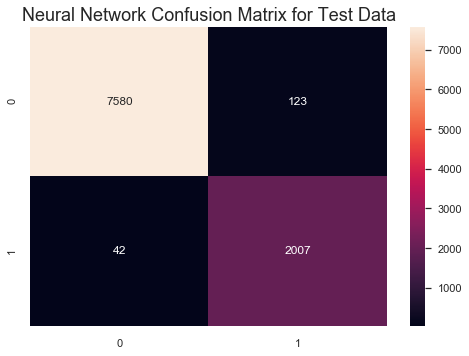

In [232]:
y_pred = model.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("Neural Network Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")